In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Генерация облака точек: куб 100x100x100
np.random.seed(42)  # для воспроизводимости
points = np.random.uniform(0, 100, size=(100_000, 3))


np.savetxt("synthetic_cloud.xyz", points)

print("Количество точек в исходном облаке:", points.shape[0])


Количество точек в исходном облаке: 100000


In [3]:
def filter_by_bbox(points, xmin, xmax, ymin, ymax, zmin, zmax):
    mask = (
        (points[:, 0] >= xmin) & (points[:, 0] <= xmax) &
        (points[:, 1] >= ymin) & (points[:, 1] <= ymax) &
        (points[:, 2] >= zmin) & (points[:, 2] <= zmax)
    )
    return points[mask]

filtered_bbox = filter_by_bbox(points, 20, 50, 30, 70, 10, 40)

print("Точек после BBox-фильтрации:", filtered_bbox.shape[0])


Точек после BBox-фильтрации: 3626


In [4]:
high_points = points[points[:, 2] > 80]

print("Точек с Z > 80:", high_points.shape[0])


Точек с Z > 80: 20041


In [5]:
def filter_by_distance(points, center, radius):
    distances = np.linalg.norm(points - center, axis=1)
    return points[distances <= radius]

center = np.array([50, 50, 50])
radius = 20

near_center = filter_by_distance(points, center, radius)

print("Точек в радиусе", radius, ":", near_center.shape[0])


Точек в радиусе 20 : 3404


In [6]:
def filter_by_circle_xy(points, center_xy, radius):
    dx = points[:, 0] - center_xy[0]
    dy = points[:, 1] - center_xy[1]
    distances = np.sqrt(dx**2 + dy**2)
    return points[distances <= radius]

circle_points = filter_by_circle_xy(points, center_xy=(50, 50), radius=30)

print("Точек внутри круга в плоскости XY:", circle_points.shape[0])


Точек внутри круга в плоскости XY: 28344


In [7]:
np.savetxt("bbox_filtered.xyz", filtered_bbox)
np.savetxt("high_points.xyz", high_points)
np.savetxt("near_center.xyz", near_center)
np.savetxt("circle_xy.xyz", circle_points)

print("Файлы сохранены")


Файлы сохранены


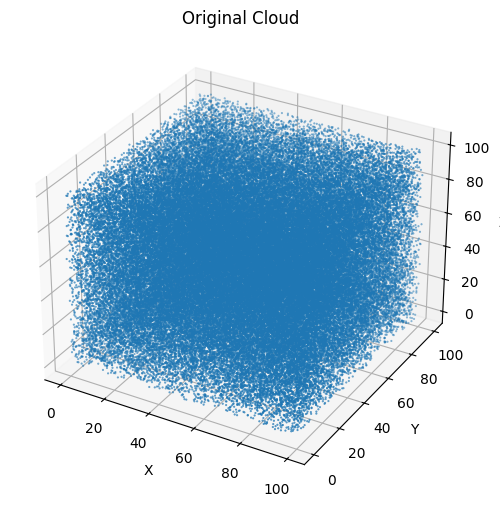

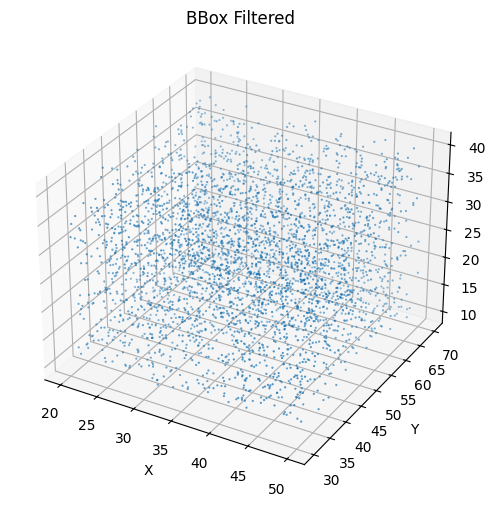

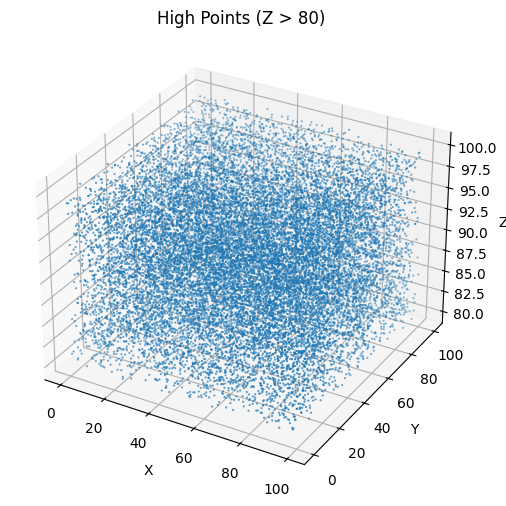

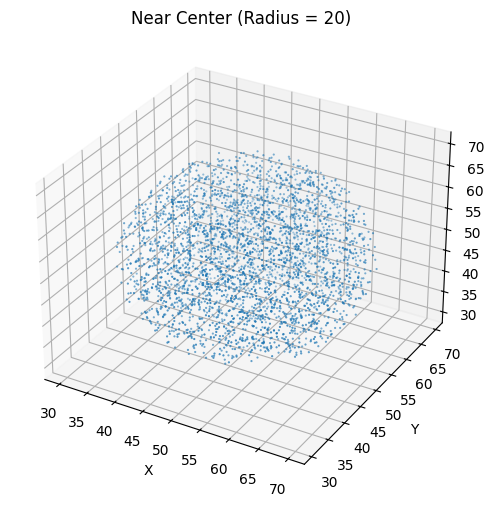

In [8]:
def show_cloud(points, title="Point Cloud"):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.3)
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.show()

show_cloud(points, "Original Cloud")
show_cloud(filtered_bbox, "BBox Filtered")
show_cloud(high_points, "High Points (Z > 80)")
show_cloud(near_center, "Near Center (Radius = 20)")
